In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import datetime as dt
from selenium import webdriver
import time
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt


   
dict_month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
              'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

def date_format_K(d):                     
    yyyy = int(d[8:12])  
    mm = int(dict_month[d[0:3]])
    dd = int(d[4:6])           

    this_date = dt.date(yyyy, mm, dd)  
    return this_date

def close_price_of_company(input_name, input_start_date):
    driver = webdriver.Chrome(r'C:\Users\jylee\Downloads\chromedriver_win32\chromedriver')
    driver.implicitly_wait(1)

    driver.get('https://finance.yahoo.com/quote/{}/history?p={}'.format(input_name, input_name))
    driver.implicitly_wait(1)
    driver.find_element_by_xpath('//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/div[1]/div/div/div/span').click()
    driver.implicitly_wait(1)
    elem = driver.find_element_by_name('startDate')
    start_date_fix = '{}\t{}{}'.format(input_start_date[:4], input_start_date[5:7], '3')
    elem.send_keys(start_date_fix)

    driver.implicitly_wait(1)
    driver.find_element_by_xpath('//*[@id="dropdown-menu"]/div/div[3]/button[1]').click()
    driver.implicitly_wait(1)
    driver.find_element_by_xpath('//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[1]/div[1]/button').click()

  

 
    while True:
        driver.execute_script("window.scrollTo(0, 9999999999);")
        time.sleep(0.3)
        html = driver.page_source
        source = BeautifulSoup(html, 'lxml')
        start_date_name = source.find('span', class_ = "C($linkColor) Fz(14px)")
        a = start_date_name.get_text()[:12]

        start_date_name_compare = source.find_all('td', class_='Py(10px) Ta(start) Pend(10px)')  

        b = start_date_name_compare[-1].get_text()

        if (a[:3]+a[6:]) == (b[:3]+b[6:]) :
            break




    date = source.find_all('td', class_ = "Py(10px) Ta(start) Pend(10px)")
    list_date = []
    for x in date:
        a = x.get_text()
        b = date_format_K(a)
        list_date.append(b)


    new_list = []
    for v in list_date:
        if v not in new_list:
            new_list.append(v)

     
    prices = source.find_all('td', class_ = "Py(10px) Pstart(10px)")

    list_prices = []
    for x in prices:
        a = x.get_text()
        d = str(a).replace(',', '')
        b = float(d)
        list_prices.append(b)
        

        
    list_close_prices = []
    list_close_prices.append(list_prices[3])
    for x in range(len(list_prices)):
        for y in range(int(len(list_prices)/5)):
            if x == 9 + (6 * y):
                list_close_prices.append(list_prices[x])
                
    historical_prices = {}
    for c in range(len(new_list)):
        for a, b in zip(new_list, list_close_prices):

                historical_prices[a] = b
                
    tmp = {input_name:historical_prices}
    tmp = pd.DataFrame(tmp) 

    print('{} was imported, and exel file was created.'.format(input_name))
    driver.close()
    
    return tmp, input_name



def draw_one_company(a):
    
    register_matplotlib_converters()

    plt.figure(figsize = (20, 10))
    plt.plot(a[0][a[1]] / a[0][a[1]].iloc[0] * 100)


    plt.legend([a[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.show()

def draw_two_company(a, b):

    register_matplotlib_converters()

    plt.figure(figsize = (20, 10))
    plt.plot(a[0][a[1]] / a[0][a[1]].iloc[0] * 100)
    plt.plot(b[0][b[1]] / b[0][b[1]].iloc[0] * 100)
   
    plt.legend([a[1], b[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.show()

def draw_three_company(a, b, c):

    register_matplotlib_converters()

    plt.figure(figsize = (20, 10))
    plt.plot(a[0][a[1]] / a[0][a[1]].iloc[0] * 100)
    plt.plot(b[0][b[1]] / b[0][b[1]].iloc[0] * 100)
    plt.plot(c[0][c[1]] / c[0][c[1]].iloc[0] * 100)
  
    plt.legend([a[1], b[1], c[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.show()

def draw_four_company(a, b, c, d):

    register_matplotlib_converters()

    plt.figure(figsize = (20, 10))
    plt.plot(a[0][a[1]] / a[0][a[1]].iloc[0] * 100)
    plt.plot(b[0][b[1]] / b[0][b[1]].iloc[0] * 100)
    plt.plot(c[0][c[1]] / c[0][c[1]].iloc[0] * 100)
    plt.plot(d[0][d[1]] / d[0][d[1]].iloc[0] * 100)

    plt.legend([a[1], b[1], c[1], d[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.show()




start_date_input = input('Please put year and month: (Ex) 2020-02 \n')
print()
number_of_companies = input('How many companies you want to see? (up to 4):\n')
print()
list_companies = list(input('Please put code of {} companies: (Ex) MSFT, AAPL \n'.format(number_of_companies)).split(', '))
print()
list_temp = []

for n in list_companies:
    a = close_price_of_company(n, start_date_input)
    list_temp.append(a)


def draw_two_seperate(a, b):
    register_matplotlib_converters()

    plt.figure(figsize = (20, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(a[0], 'royalblue')
    plt.legend([a[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.subplot(2, 2, 2)
    plt.plot(b[0], color = 'darkorange')
    plt.legend([b[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.show()
    
def draw_three_seperate(a, b, c):
    register_matplotlib_converters()

    plt.figure(figsize = (20, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(a[0], 'royalblue')
    plt.legend([a[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.subplot(2, 2, 2)
    plt.plot(b[0], color = 'darkorange')
    plt.legend([b[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.subplot(2, 2, 3)
    plt.plot(c[0], 'g')
    plt.legend([c[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.show()
    
  
def draw_four_seperate(a, b, c, d):
    register_matplotlib_converters()

    plt.figure(figsize = (20, 10))
    plt.subplot(2, 2, 1)
    plt.plot(a[0], 'royalblue')
    plt.legend([a[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.subplot(2, 2, 2)
    plt.plot(b[0], color = 'darkorange')
    plt.legend([b[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)   
    
    plt.subplot(2, 2, 3)
    plt.plot(c[0], 'g')
    plt.legend([c[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.subplot(2, 2, 4)
    plt.plot(d[0], 'r')
    plt.legend([d[1]], loc='upper left')
    plt.xticks(color = 'r', fontsize = 15, rotation = 30)
    plt.yticks(color = 'r', fontsize = 15)
    plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)
    
    plt.show()


Please put year and month: (Ex) 2020-02 
2019-02

How many companies you want to see? (up to 4):
4

Please put code of 4 companies: (Ex) MSFT, AAPL 
MSFT, TSLA, NFLX, AAPL

MSFT was imported, and exel file was created.
TSLA was imported, and exel file was created.
NFLX was imported, and exel file was created.
AAPL was imported, and exel file was created.


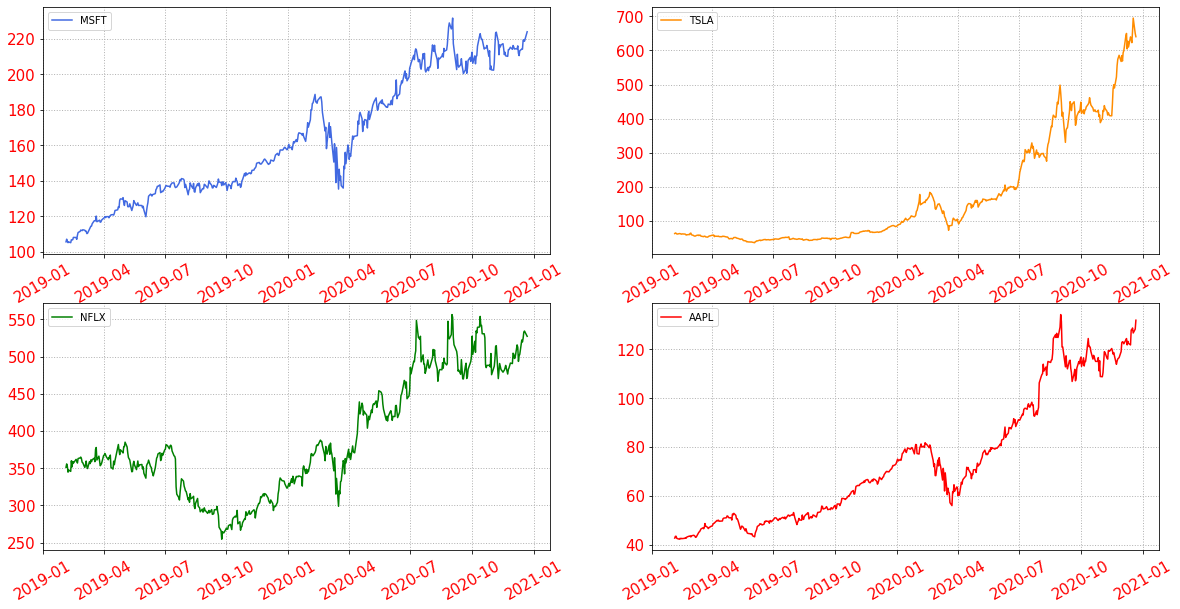

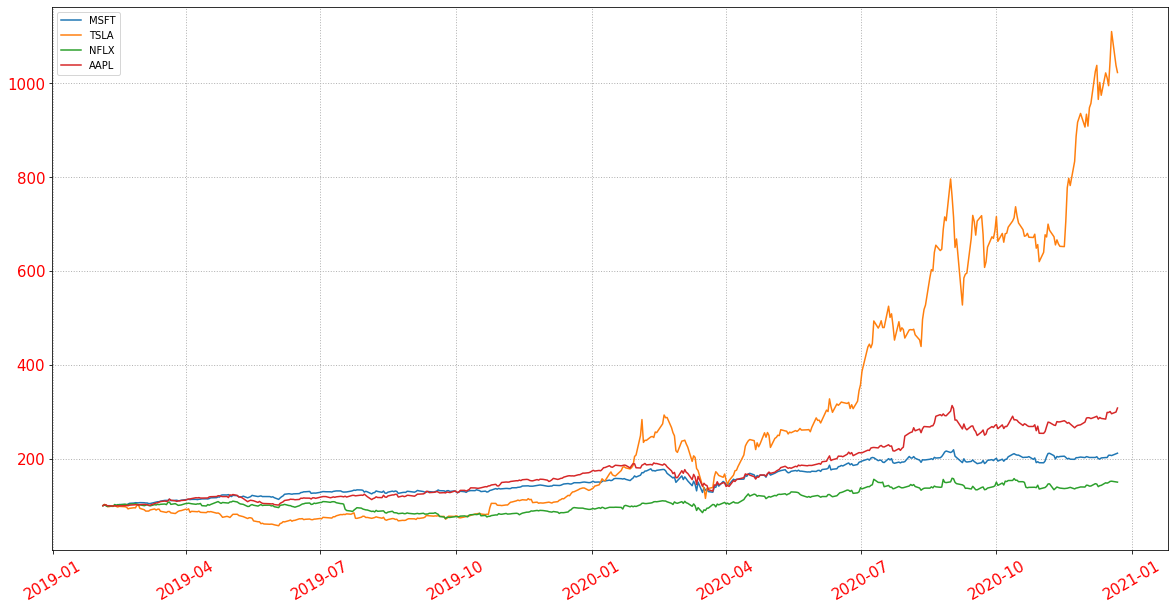

In [2]:
if len(list_companies) == 1:
    list_temp[0][0].to_excel(str(list_temp[0][1]) +'.xlsx')
    draw_one_company(list_temp[0])
    
elif len(list_companies) == 2:
    list_temp[0][0].to_excel(str(list_temp[0][1]) +'.xlsx')
    list_temp[1][0].to_excel(str(list_temp[1][1]) +'.xlsx')
    draw_two_seperate(list_temp[0], list_temp[1])
    draw_two_company(list_temp[0], list_temp[1])

    
elif len(list_companies) == 3:
    list_temp[0][0].to_excel(str(list_temp[0][1]) +'.xlsx')
    list_temp[1][0].to_excel(str(list_temp[1][1]) +'.xlsx')
    list_temp[2][0].to_excel(str(list_temp[2][1]) +'.xlsx')
    draw_three_seperate(list_temp[0], list_temp[1], list_temp[2])
    draw_three_company(list_temp[0], list_temp[1], list_temp[2])
    
elif len(list_companies) == 4:
    list_temp[0][0].to_excel(str(list_temp[0][1]) +'.xlsx')
    list_temp[1][0].to_excel(str(list_temp[1][1]) +'.xlsx')
    list_temp[2][0].to_excel(str(list_temp[2][1]) +'.xlsx')
    list_temp[3][0].to_excel(str(list_temp[3][1]) +'.xlsx')
    draw_four_seperate(list_temp[0], list_temp[1], list_temp[2], list_temp[3])
    draw_four_company(list_temp[0], list_temp[1], list_temp[2], list_temp[3])